In [2]:
#Dataframe
import yaml
import pandas as pd
import numpy as np

pd.options.display.max_seq_items = 3000000
#Viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [3]:
def read_config(file_path='./config.yaml'):
    """Reads configuration file
    Args:
        file_path (str, optional): file path
    Returns:
        dict: Parsed configuration file
    """
    with open(file_path, "r") as f:
        return yaml.safe_load(f)

def get_data(file_path=None, nrows=None):
    """Loads data
    Args:
        file_path (str, optional): file path of dataset
            By default load data set from static web page
        nrows (int, optional): number or rows to loads from dataset
            By default loads all dataset  
    Returns:
        dataframe: output dataframe
    """
    if file_path is None:
        cfg = read_config()
        file_path = cfg['paths']['eng_dataset']
    print("Reading dataset ...")    
    return pd.read_csv(file_path,sep="\t", encoding="utf-8",
                       nrows=nrows, low_memory=False)

if __name__ == "__main__":
    data = get_data(file_path = "df_withoutduplicatefeatures4.csv", nrows = 1500000)
    print(f"data set shape is {data.shape}")

Reading dataset ...


FileNotFoundError: [Errno 2] No such file or directory: 'df_withoutduplicatefeatures4.csv'

In [ ]:
data.head(3)

In [ ]:
columns = list(data.columns.values.tolist())
columns

In [ ]:
NutriIngre = data.filter(like = '_100g')

In [ ]:
filling_features = null_factor(data, 0)
filling_features["Null_Value"] = 100-filling_features["Null_Value"]
filling_features = filling_features.sort_values("Null_Value", ascending=False) 

#Seuil de suppression
sup_threshold = 25

fig = plt.figure(figsize=(20, 35))

font_title = {'family': 'serif',
              'color':  '#124b98',
              'weight': 'bold',
              'size': 13,
             }

sns.barplot(x="Null_Value", y="Variable", data=filling_features, palette="tab10")
#Seuil pour suppression des varaibles
plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
plt.text(sup_threshold+2, 65, 'Seuil de suppression des variables', fontsize = 16, color = 'r')

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.show()

## Outliers

We will work on the outliers to assure there is no incovenant values

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


class TestVisualizationFunctions:
    def __init__(self):
        # Create a sample dataframe for testing
        self.df = pd.DataFrame({
            'col1': ['florent', 'joelle', 'nicolas', 'thomas'],
            'col2': [1, 2, 3, 4],
            'col3': ['a', 'b', 'c', 'd'],
            'col4': [1.0, 2.0, 3.0, 4.0]
        })

    def test_plot_wordcloud(self):
        # Test if the function wordcloud runs without errors
        plot_wordcloud(self.df, 'col1')

    def test_plot_density(self):
        # Test if the function density runs without errors
        plot_density(self.df, 'col2')

    def test_plot_unique_values(self):
        # Test if the function values runs without errors
        plot_unique_values(self.df)

    def test_plot_histogram(self):
        # Test if the function histogram runs without errors
        plot_histogram(self.df, 'col4')


def plot_wordcloud(data, column):
    """
    Displays a wordcloud for the given column.
    Args:
        data (DataFrame): The dataframe to use. Should contain at least one column of string type.
        column (str): The name of the column to display. Should be a string column.
    """
    if isinstance(data[column].iloc[0], str):
      text = ' '.join(data[column].astype(str).tolist())
      wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='Set2', min_font_size=10).generate(text)

      plt.figure(figsize=(8, 8), facecolor=None)
      plt.imshow(wordcloud)
      plt.axis('off')
      plt.tight_layout(pad=0)
      plt.show()
    else:
      raise ValueError("Column should be of string type")


def plot_density(data, column):
    """
    Displays a density plot for the given column.
    Args:
        data (DataFrame): The dataframe to use. Should contain at least one numeric column.
        column (str): The name of the column to display. Should be a numeric column.
    """
    if pd.api.types.is_numeric_dtype(data[column]):
      data[column].plot(kind='density')
      plt.show()
    else :
      raise ValueError("Column should be of numeric type")


def plot_unique_values(data):
    """
    Displays a barplot for each column of the given dataframe,
    showing the number of unique values for each column.
    Args:
        data (DataFrame): The dataframe to use. Should contain at least one numeric column.
    """
    numeric_cols = data.select_dtypes(include=['number']).columns
    if len(numeric_cols) == 0:
        raise ValueError("At least one column should be of numeric type")
    else:
        for col in numeric_cols:
            unique_vals = data[col].nunique()
            plt.bar(col, unique_vals)
        plt.xticks(rotation=90)
        plt.xlabel('Columns')
        plt.ylabel('Number of unique values')
        plt.show()


def plot_histogram(data, column):
    """
    Displays a histogram for the given column.
    Args:
        data (DataFrame): The dataframe to use. Should contain at least one numeric column.
        column (str): The name of the column to display. Should be a numeric column.
    """
    if isinstance(data[column].iloc[0], (int, float)):
      data[column].hist()
      plt.xlabel(column)
      plt.ylabel('Frequency')
      plt.show()
    else:
      raise ValueError("Column should be of numeric type")

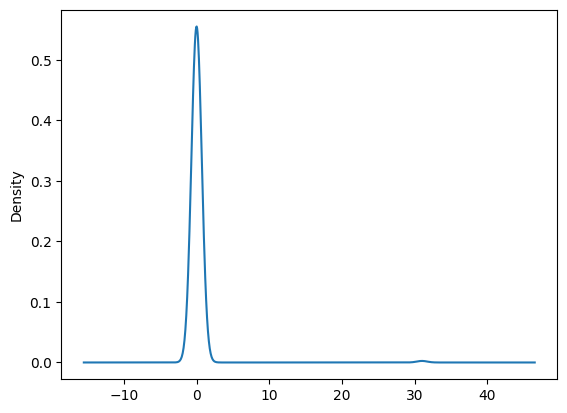

In [7]:
plot_density(NutriIngre, 'fluoride_100g')

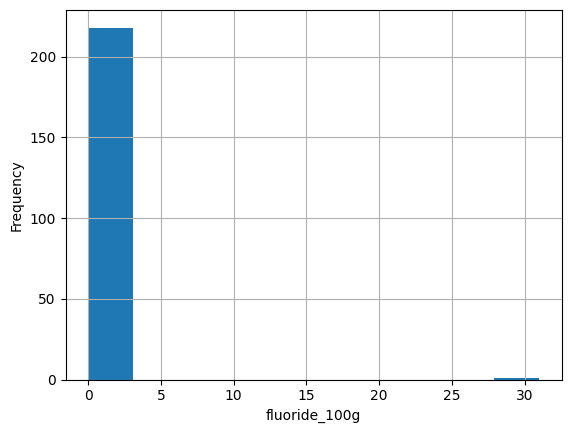

In [8]:
plot_histogram(NutriIngre, 'fluoride_100g')

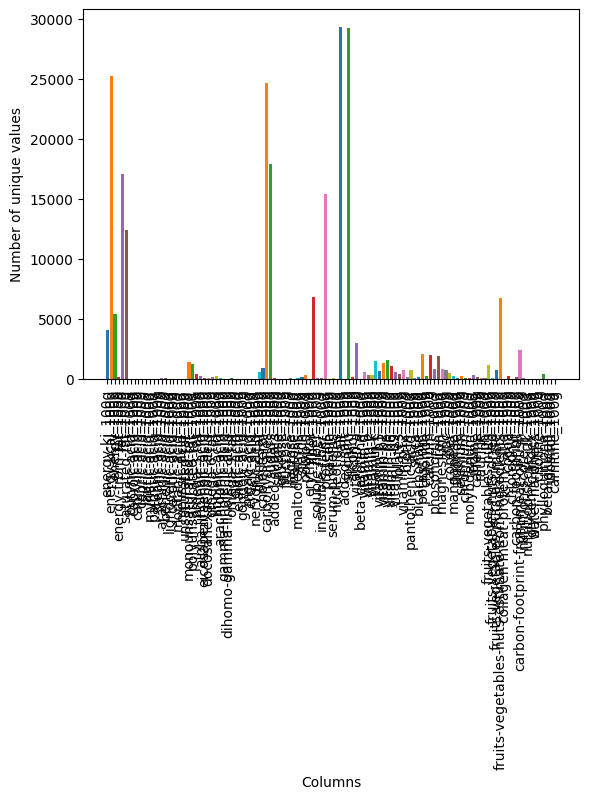

In [9]:
plot_unique_values(NutriIngre)

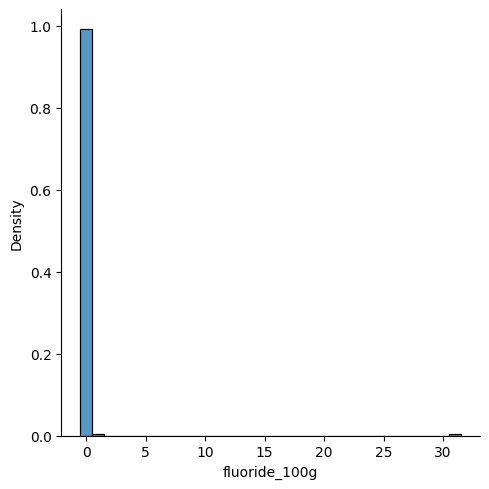

In [10]:
sns.displot(NutriIngre, x='fluoride_100g',stat = 'density', discrete=True)

In [11]:
NegNutri = NutriIngre[NutriIngre < 0].sum()
NegNutri

energy-kj_100g          0.0
energy-kcal_100g        0.0
energy_100g             0.0
energy-from-fat_100g    0.0
fat_100g                0.0
                       ... 
choline_100g            0.0
phylloquinone_100g      0.0
beta-glucan_100g        0.0
inositol_100g           0.0
carnitine_100g          0.0
Length: 116, dtype: float64

In [12]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

def outliers_process(df, columns, method = 'median', k=1.5, sklearn_method=False):
    """
    Detects and handles outliers in a pandas DataFrame using Interquartile Range or
    IsolationForest detection method.
    If IQR method, mean or median calculated on all values in column.
    If IsolationForest method, mean or median calculated on all non-outlier values in column.
    Keyword arguments:
    ------------------
        df: pandas.DataFrame
            The input DataFrame.
        columns: list of str
            The list of column names to handle outliers for.
        method: str, optional (default 'nan').
            The method to use for handling outliers.
            Available methods are 'nan', mean', 'median', and 'drop'
        k: float, optional (default 1.5)
            The multiplier for the IQR range.
        sklearn_method: bool, optional (default False)
            Will use IQR method to detect and remove outliers if set False,
            else will use IsolationForest method.
    Returns:
    --------
        pandas.DataFrame
            The DataFrame with outliers handled.
    Author:
    -------
        Joëlle Sabourdy
    """
    df_outliers = df.copy()

    if sklearn_method == True:
        for i in columns:
            # Extract values to process
            X = df_outliers[[i]].values

            # Define and fit the IsolationForest model
            model = IsolationForest()
            model.fit(X)

            # Compute the outlier scores and classify outliers
            outlier_scores = model.decision_function(X)
            outliers_condition = model.predict(X) == -1

            # handle outliers
                # replace outliers with NaN value
            if method == 'nan':
                df_outliers.loc[outliers_condition, i] = np.nan
                # drop rows with outliers
            elif method == 'drop':
                df_outliers = df_outliers.loc[~outliers_condition, :]
                 # replace outliers with median value
            elif method == 'median':
                median = df_outliers.loc[~outliers_condition, i].median()
                df_outliers.loc[outliers_condition, i] = median
                 # replace outliers with mean value
            elif method == 'mean':
                mean = df_outliers.loc[~outliers_condition, i].mean()
                df_outliers.loc[outliers_condition, i] = mean
            else:
                raise ValueError("Invalid method. Allowed methods: 'nan','drop', 'median', 'mean'.")

    else:
        # InterQuartile Range method
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds for outliers detection
        min = Q1 - k * IQR
        max = Q3 + k * IQR

        # conditions
        outliers_condition = ((df_outliers < min) | (df_outliers > max))

        # handle outliers
            # replace outliers with NaN value
        if method == 'nan':
            df_outliers = df_outliers.mask(outliers_condition)
            # drop rows with outliers
        elif method == 'drop':
            df_outliers = df_outliers[~outliers_condition.any(axis=1)]
            # replace outliers with median value
        elif method == 'median':
            median = df_outliers[columns].median()
            df_outliers = df_outliers.mask(outliers_condition, median, axis=1)
            # replace outliers with mean value
        elif method == 'mean':
            mean = df_outliers[columns].mean()
            df_outliers = df_outliers.mask(outliers_condition, mean, axis=1)
        else:
            raise ValueError("Invalid method. Allowed methods: 'nan','drop', 'median', 'mean'.")

    return df_outliers

In [4]:
columns = list(data.filter(like = '_100g').columns.values.tolist())

## Nutriment 

The Nutriment features are a huge part of dataset. It could be a decision making in our clustering ML

In [5]:
def GetDf(df, keyword):
    #Get element
    df_cat = df.filter(like=keyword)
    list_name = list(df_cat.columns.values.tolist())
    return df_cat

In [6]:
def GetList(df, keyword):
    #Get element
    df_cat = df.filter(like=keyword)
    list_name = list(df_cat.columns.values.tolist())
    return list_name

In [7]:
#Get Nutrinnal element '_100g'
nutriment_cat = data.filter(like='_100g')

#Get 'energy' element
energy_cat = nutriment_cat.filter(like='energy')
energy_list = list(energy_cat.columns.values.tolist())

#Drop 'energy' element
nutriment_cat = nutriment_cat.drop(columns = energy_list)

#Fat
fat_cat = nutriment_cat.filter(like='fat')
fat_list = list(fat_cat.columns.values.tolist())
nutriment_cat = nutriment_cat.drop(columns = fat_list)

#Vitamin
vitamin_cat = nutriment_cat.filter(like='vitamin')
vitamin_list = list(vitamin_cat.columns.values.tolist())
nutriment_cat = nutriment_cat.drop(columns = vitamin_list)

#Acid
acid_cat = nutriment_cat.filter(like='acid')
acid_list = list(acid_cat.columns.values.tolist())
nutriment_cat = nutriment_cat.drop(columns = acid_list)

#List of column's df
NutriList = list(nutriment_cat.columns.values.tolist())

We see many group on the 100g features. we will zoom on each part

In [17]:
df_footprint = GetDf(nutriment_cat,'footprint')
list_footprint = GetList(nutriment_cat,'footprint')
df_fruit = GetDf(nutriment_cat,'fruit')
list_fruit = GetList(nutriment_cat,'fruit')

#Data from Fruit
data[list_fruit].boxplot(vert=False, figsize=(15,2))
plt.savefig('OutlFruit.png')
plt.gca().set(xlim=(-100,1000))

#Data from Carbon footprint
data[list_footprint].boxplot(vert=False, figsize=(15,2))
plt.savefig('OutlFoot2.png')
plt.gca().set(xlim=(-100,12500))

In [20]:
data[['carbon-footprint_100g','product_name']][data['carbon-footprint_100g'] >2000]

,carbon-footprint_100g,product_name
1113925,2520.0,Viande des grisons
1115964,2380.0,Saucisson sec


#Data from Energy
data[energy_list].boxplot(vert=False, figsize=(15,3))
plt.savefig('OutlEnergy.png')
plt.gca().set(xlim=(-100,20000))

#Data from Fat
data[fat_list].boxplot(vert=False, figsize=(15,5))
plt.savefig('OutlFat.png')
plt.gca().set(xlim=(-100,20000))

#Data from Vitamin
data[vitamin_list].boxplot(vert=False, figsize=(15,5))
plt.savefig('OutlVitamin.png')
plt.gca().set(xlim=(-100,12500))

In [24]:
data[['vitamin-a_100g','product_name']][data['vitamin-a_100g'] >2000]

,vitamin-a_100g,product_name
95109,2117.7,Bolthouse Farms Baby-Cut Carrots
101214,4280.0,California sun dried tomatoes halves
286668,4374.9,100% Carrot vegetable juice
316990,3000.0,Emerils original essence
317009,3000.0,Emerils seasoning blend original essence
377900,7500.0,Beta Carotene (Vitamin A)
508024,2294.1,Green leaf lettuce
721442,2878.8,Mama Blueberry Fruit & Veggie Blend
744558,7500.0,Organic goji berries
780540,11800.0,Petit Pain Pack


#Data from Acid
data[acid_list].boxplot(vert=False, figsize=(15,10))
plt.savefig('OutlAcid.png')
plt.gca().set(xlim=(-500,4000))

#Data from 100g
data[NutriList].boxplot(vert=False, figsize=(15,20))
plt.savefig('OutlNutri.png')
plt.gca().set(xlim=(-100,20000))

## Correlation Map

In [27]:
#Correlation Map
def coreation_map(df,colmuns,PlotName,x,y):
    #Matrice des corrélations acid
    corr_mat = df[colmuns].corr()
    #heatmap
    fig = plt.figure(figsize=(x,y))
    sns.heatmap(corr_mat, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
    plt.title("Coefficients de corrélation de Pearson")
    plt.savefig(PlotName+'.png')
    return plt.show()

### Fruit

coreation_map(data,list_fruit,'FruitMap',3,3)

### Acid

coreation_map(data,acid_list,'AcidMap',20,20)

### Energy Map

coreation_map(data,energy_list,'EnergyMap',3,3)

### Fat

coreation_map(data,fat_list,'image/FatMap',6,6)

### Vitamin

coreation_map(data,vitamin_list,'image/VitaminMap',6,7)

### Other nutriment

coreation_map(data,NutriList,'image/NutriMap',35,35)

This correlation map show there is possibility to reduce features using pca or other tool. It can improve processing and decision

## Nutriscore

'nutriscore_score',
 'nutriscore_grade'

In [34]:
datas = data[['additives_n','additives_en','nutriscore_score','nutriscore_grade',
           'nova_group','ecoscore_score','energy-kj_100g','energy-kcal_100g','energy_100g',
           'energy-from-fat_100g','fat_100g','saturated-fat_100g','butyric-acid_100g','caproic-acid_100g','caprylic-acid_100g','capric-acid_100g','lauric-acid_100g','myristic-acid_100g',
           'palmitic-acid_100g','stearic-acid_100g','arachidic-acid_100g','behenic-acid_100g','lignoceric-acid_100g',
           'cerotic-acid_100g','montanic-acid_100g','melissic-acid_100g','unsaturated-fat_100g','monounsaturated-fat_100g',
           'polyunsaturated-fat_100g','omega-3-fat_100g','alpha-linolenic-acid_100g','eicosapentaenoic-acid_100g',
           'docosahexaenoic-acid_100g','omega-6-fat_100g','linoleic-acid_100g','arachidonic-acid_100g','gamma-linolenic-acid_100g',
           'dihomo-gamma-linolenic-acid_100g','omega-9-fat_100g','oleic-acid_100g','elaidic-acid_100g','gondoic-acid_100g','mead-acid_100g',
           'erucic-acid_100g','nervonic-acid_100g','trans-fat_100g','cholesterol_100g','carbohydrates_100g',
           'sugars_100g','added-sugars_100g','sucrose_100g','glucose_100g','fructose_100g',
           'lactose_100g','maltose_100g','maltodextrins_100g','starch_100g',
           'polyols_100g','erythritol_100g','fiber_100g','soluble-fiber_100g','insoluble-fiber_100g','proteins_100g','casein_100g','serum-proteins_100g',
           'nucleotides_100g','salt_100g','added-salt_100g','sodium_100g','alcohol_100g',
           'vitamin-a_100g','beta-carotene_100g',
           'vitamin-d_100g','vitamin-e_100g','vitamin-k_100g',
           'vitamin-c_100g','vitamin-b1_100g','vitamin-b2_100g','vitamin-pp_100g',
           'vitamin-b6_100g','vitamin-b9_100g','folates_100g','vitamin-b12_100g',
           'biotin_100g','pantothenic-acid_100g','silica_100g','bicarbonate_100g','potassium_100g','chloride_100g','calcium_100g','phosphorus_100g','iron_100g','magnesium_100g',
           'zinc_100g','copper_100g','manganese_100g',
           'fluoride_100g','selenium_100g','chromium_100g','molybdenum_100g',
           'iodine_100g','caffeine_100g','taurine_100g','ph_100g','fruits-vegetables-nuts_100g','fruits-vegetables-nuts-dried_100g',
           'fruits-vegetables-nuts-estimate_100g',
           'fruits-vegetables-nuts-estimate-from-ingredients_100g',
           'collagen-meat-protein-ratio_100g','cocoa_100g','chlorophyl_100g',
           'carbon-footprint_100g','carbon-footprint-from-meat-or-fish_100g','nutrition-score-fr_100g',
           'nutrition-score-uk_100g','glycemic-index_100g','water-hardness_100g','choline_100g',
           'phylloquinone_100g','beta-glucan_100g','inositol_100g','carnitine_100g'
             ]]

In [35]:
datas

,additives_n,additives_en,nutriscore_score,nutriscore_grade,nova_group,ecoscore_score,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.0,690.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,-5.0,a,NaN,34.0,NaN,57.0,238.0,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.0,1569.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499995,0.0,NaN,1.0,b,3.0,13.0,343.0,71.0,343.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1499996,NaN,NaN,4.0,c,NaN,39.0,NaN,259.0,1084.0,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1499997,NaN,NaN,11.0,d,NaN,6.0,NaN,270.0,1130.0,NaN,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1499998,NaN,NaN,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
datas_nutri = datas[(datas['nutriscore_grade'].isnull()==False) & 
                   (datas['nutriscore_score'].isnull()==False)]

In [37]:
datas_nutri.isnull().count()
columns = len(data_nutri)
for i in columns: 
    if data_nutri.loc

additives_n           564671
additives_en          564671
nutriscore_score      564671
nutriscore_grade      564671
nova_group            564671
                       ...  
choline_100g          564671
phylloquinone_100g    564671
beta-glucan_100g      564671
inositol_100g         564671
carnitine_100g        564671
Length: 122, dtype: int64

In [45]:
data_test = data[['energy-kj_100g','nutriscore_grade']]
type(data_test)

pandas.core.frame.DataFrame

In [ ]:
fig = sns.pairplot(datas_nutri.sample(frac=0.05), hue="nutriscore_grade")
fig.savefig("image/PlotAdditiveNutriScore.png")

In [ ]:
nutrigrades = NutriIngre.groupby(by='nutriscore_grade')['code'].nunique().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

explodes = np.zeros(5)
explodes[0] = .1

plt.pie(nutrigrades, labels=nutrigrades.index, 
        startangle=0, 
        shadow=True,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="black",size=12, weight="bold"))
plt.title("Répartition des Nutrigrades", fontdict=font_title)
plt.show()

## Product Name 

In [8]:
def wordcloud_plot(df,column,max_words,name_save):
    stop_word = get_stop_words('english') + get_stop_words('french')

    text = ' '.join(df[column].dropna().values)

    # Création de l'objet WordCloud
    wordcloud = WordCloud(background_color="purple",
                      stopwords = stop_word,
                      max_font_size= 300,
                      width=800,
                      max_words=max_words,
                      height=400).generate(text)

    # Affichage du nuage de mots
    fig = plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(name_save)
    plt.show()
    plt.close()

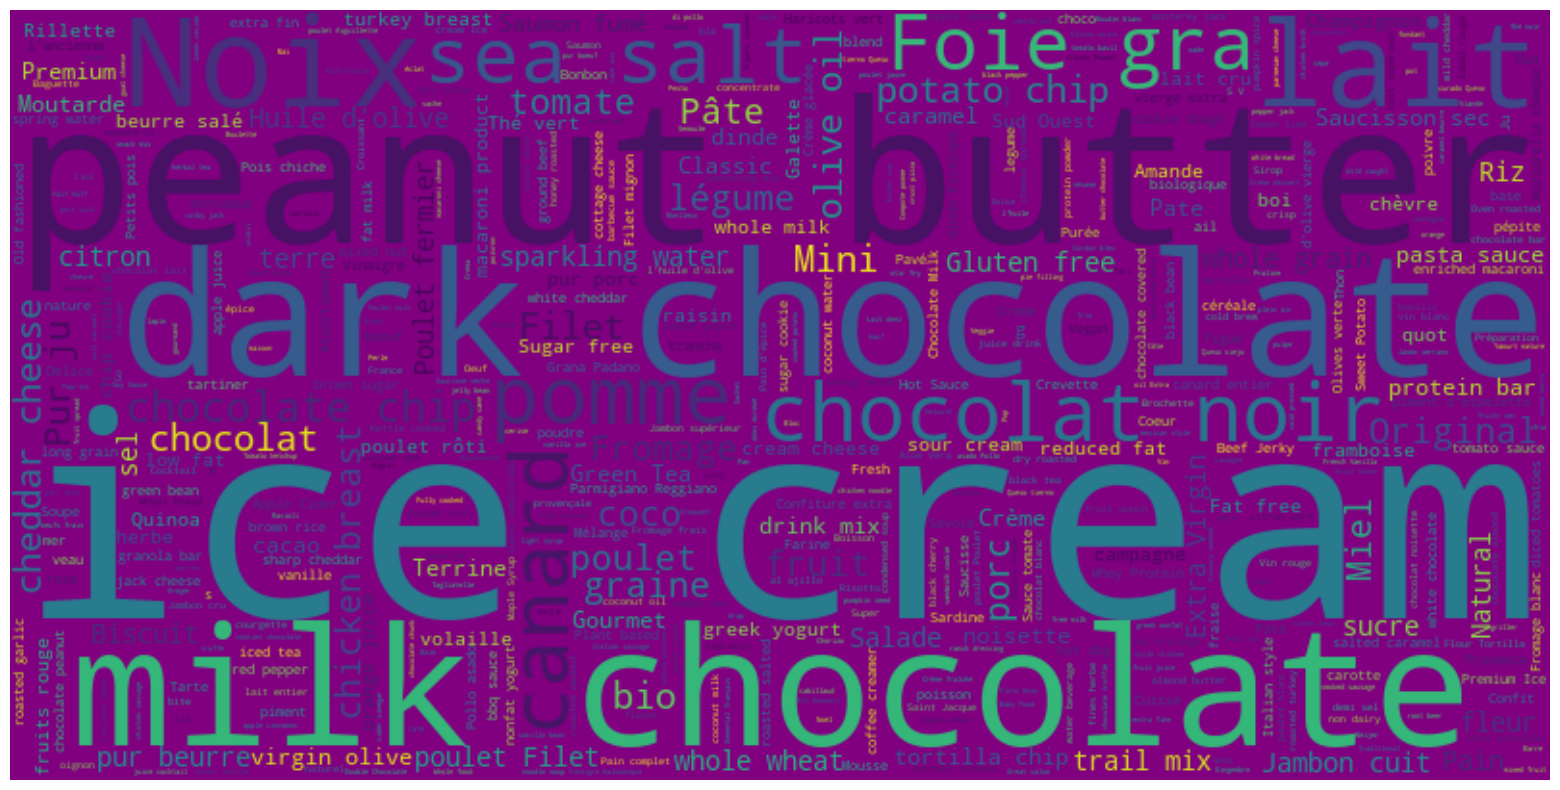

In [ ]:
from wordcloud import WordCloud
from stop_words import get_stop_words

wordcloud_plot(data,'product_name',3000,'image/product_wordcloud.png')

## PNS GROUP 1

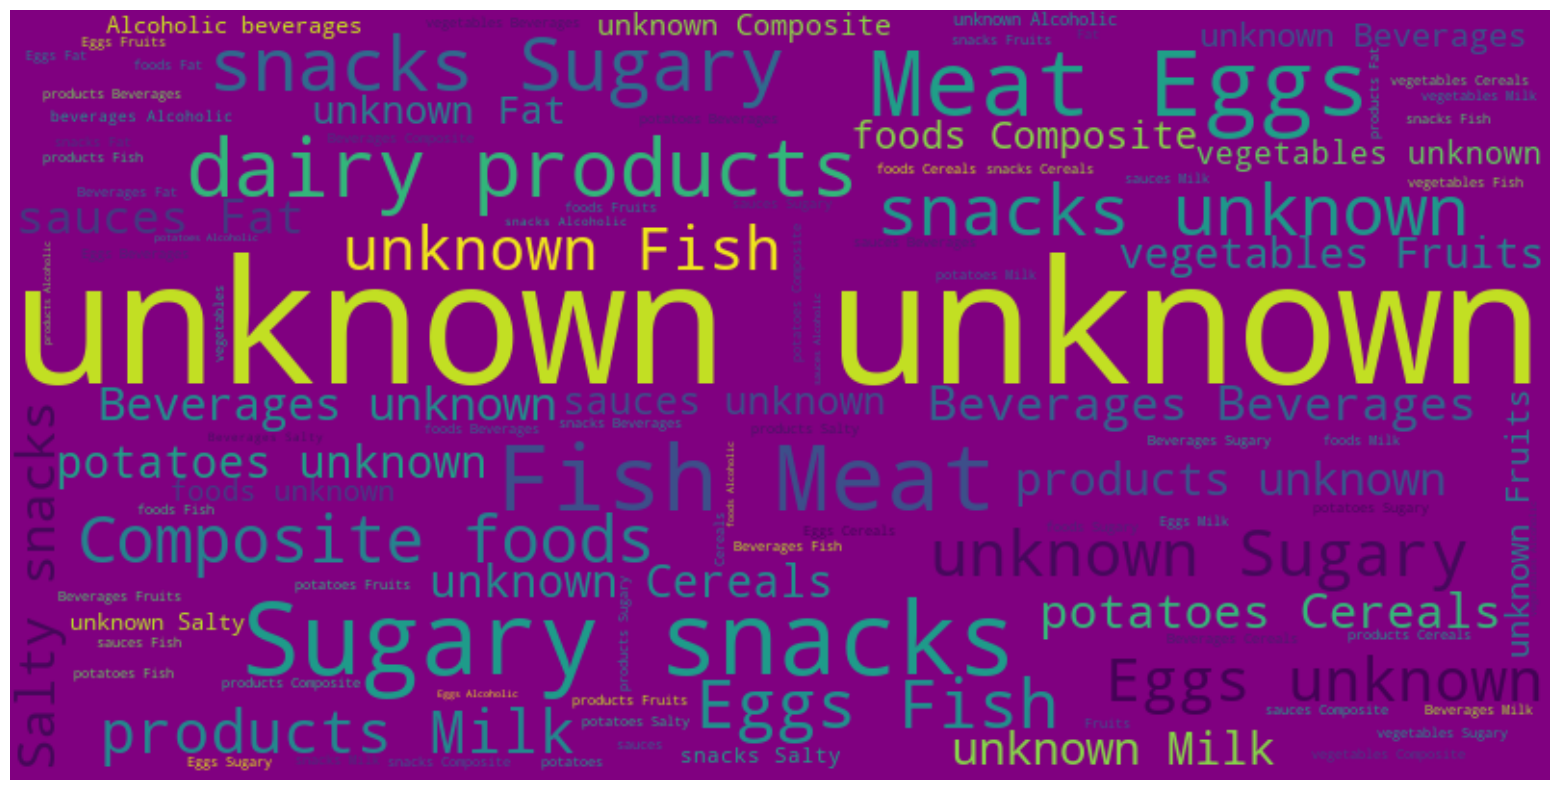

In [10]:
wordcloud_plot(data,'pnns_groups_1',3000,'image/groups_1_wordcloud.png')

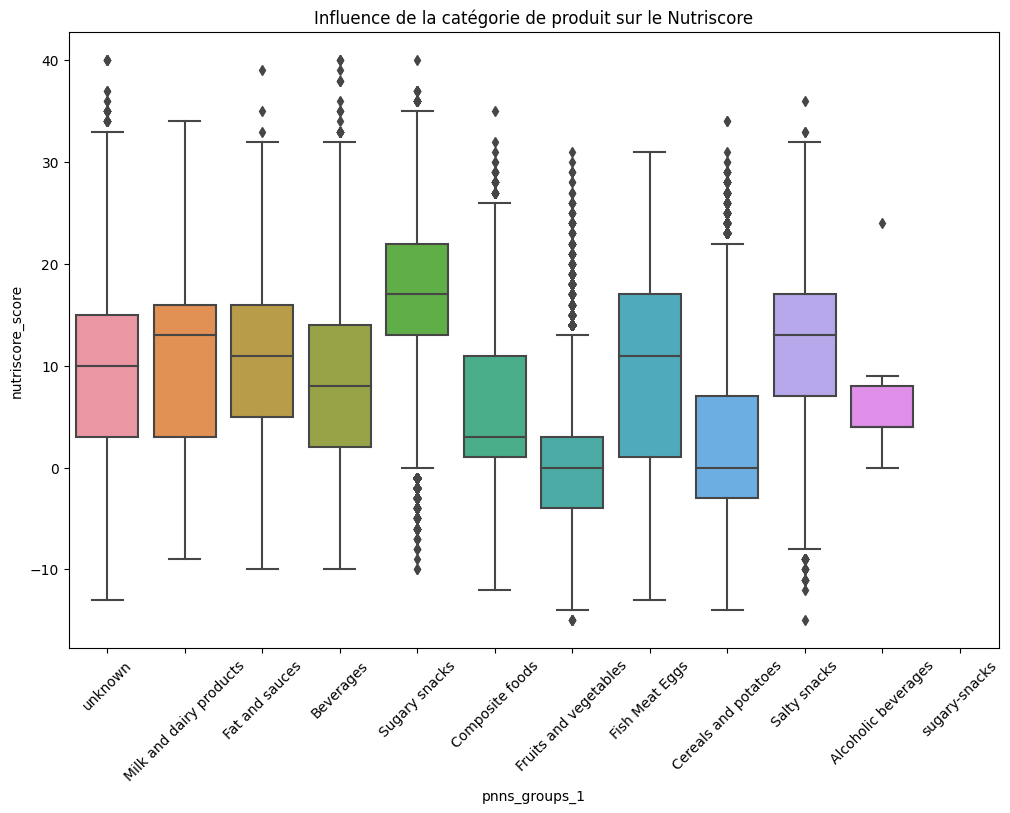

In [12]:
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(data=data, x='pnns_groups_1', y='nutriscore_score')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Influence de la catégorie de produit sur le Nutriscore")
plt.show()

## PNS GROUP 2

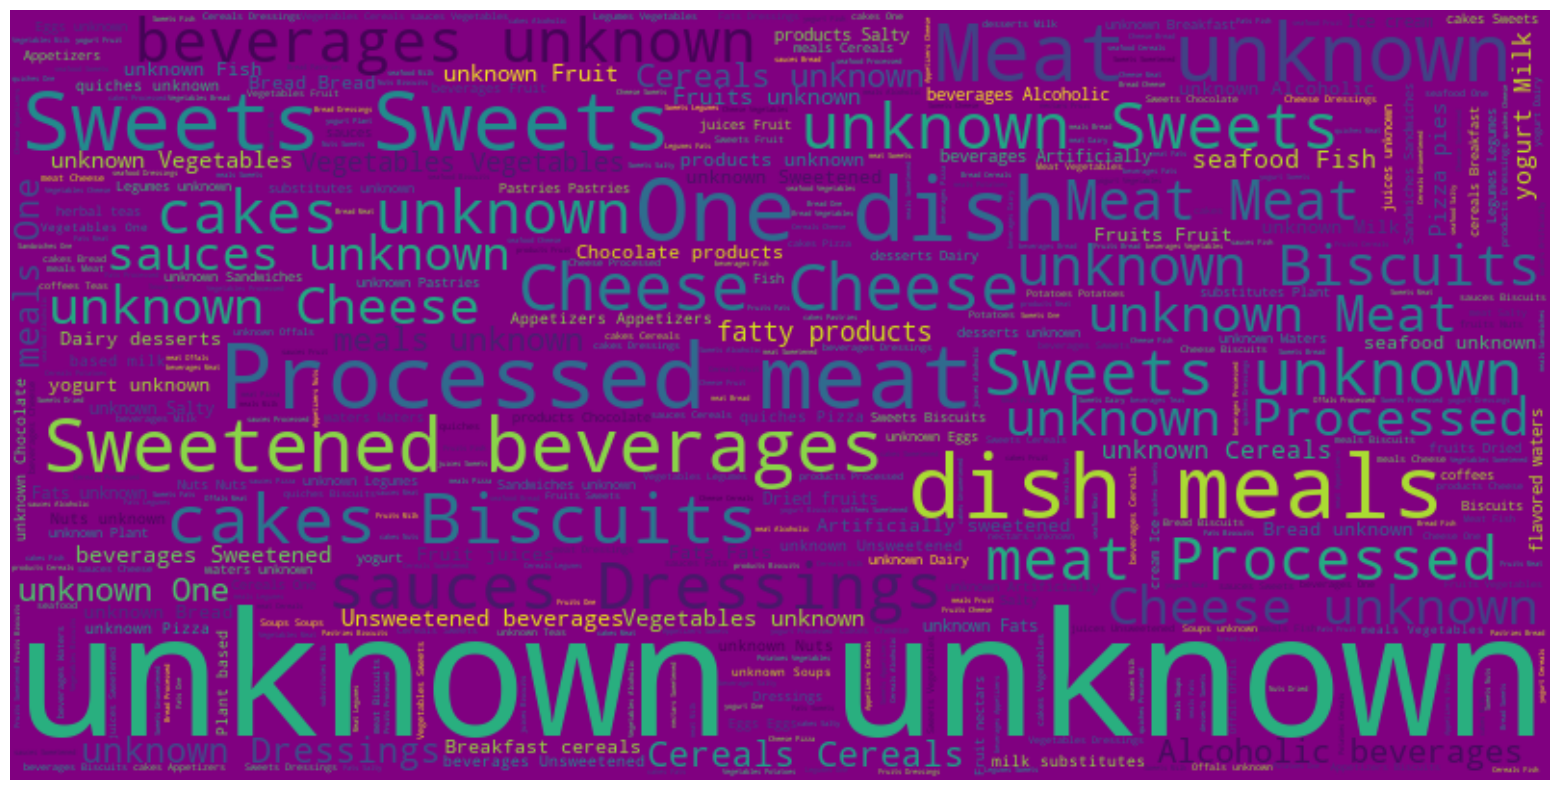

In [13]:
wordcloud_plot(data,'pnns_groups_2',300,'image/groups_2_wordcloud.png')

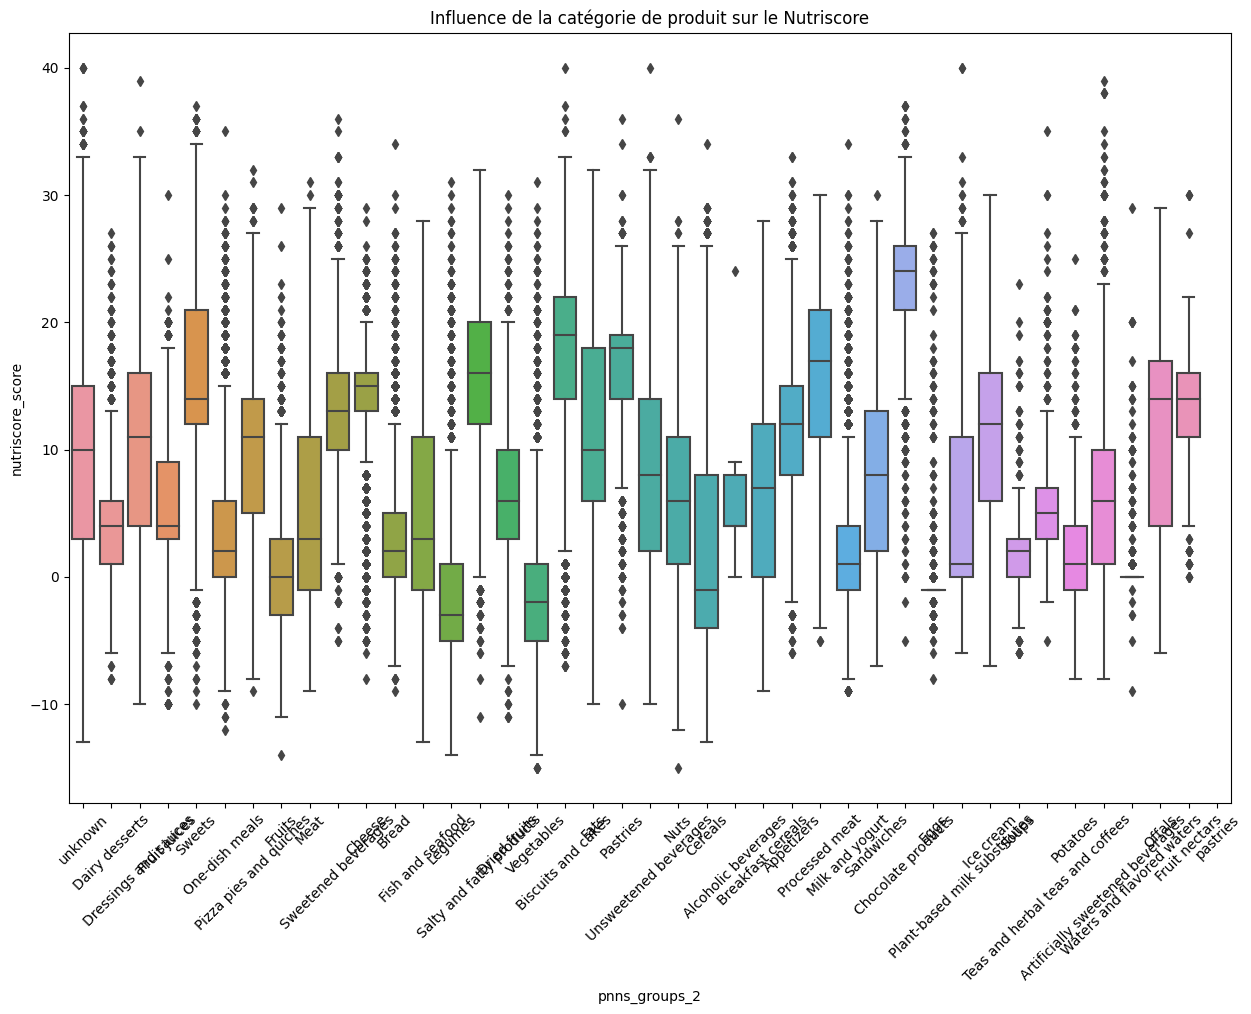

In [17]:
fig = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=data, x='pnns_groups_2', y='nutriscore_score')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Influence de la catégorie de produit sur le Nutriscore")
plt.show()

## Quantity

In [18]:
data.quantity

0            NaN
1            NaN
2            NaN
3          480 g
4            NaN
           ...  
1499995    48 cl
1499996      NaN
1499997      NaN
1499998      NaN
1499999    100 g
Name: quantity, Length: 1500000, dtype: object

In [19]:
data['quantity'] = data['quantity'].astype('object')

In [20]:
# Function selecting the most relevant tuple (num,unit) in the list
# by order of priority : unit in li_prio1, then in li_prio2

def sel_gr(li, li_prio1, li_prio2):
  res = 0
  nums, units = li
  tab_t_u = []
  ind = np.nan
  for i in units:
    if  i in li_prio1:
      tab_t_u.append(2)
    elif  i in li_prio2:
      tab_t_u.append(1)
    else:
      tab_t_u.append(0) if i!='' else tab_t_u.append(np.nan)
  i_tab1 = [i for i in range(len(tab_t_u)) if tab_t_u[i]==2] # indexes of all volumes (prio1)
  i_tab2 = [i for i in range(len(tab_t_u)) if tab_t_u[i]==1] # indexes of all masses (prio2)
  i_tab0 = [i for i in range(len(tab_t_u)) if tab_t_u[i]==0] # indexes of all others (prio3)
  if len(i_tab1)>0: # prio1 (vol)
    ind = i_tab1[np.argmax([nums[i] for i in i_tab1])]
  elif len(i_tab2)>0: # prio2 (mass)
    ind = i_tab2[np.argmax([nums[i] for i in i_tab2])]
  else:
    ind = i_tab0[np.argmax([nums[i] for i in i_tab0])] if len(i_tab0)>0 else np.nan
  return(nums[ind], units[ind]) if ind is not np.nan else (np.nan, np.nan)

In [ ]:
# Creating a new database with 'quantity' data (wo null, same index)

df_q = data['quantity'].dropna().to_frame()
print("Nb of notna values in 'quantity': {} on {}, i.e. {:.1f}%"\
           .format(df_q.shape[0], data.shape[0],df_q.shape[0]*100/data.shape[0]))
display(df_q.head(15).T)

In [ ]:
wordcloud_plot(data,'quantity',3000,'image/quantity_WCloud.png')

## Packaging

In [ ]:
wordcloud_plot(data,'packaging_en',3000,'image/packaging_WCloud.png')

In [ ]:
wordcloud_plot(data,'packaging_text',3000,'image/packaging_txt_WCloud.png')

## Categories

In [ ]:
wordcloud_plot(data,'categories_en',3000,'image/categories_WCloud.png')